In [ ]:
# dataset['Sex'] = dataset['Sex'].astype('category').cat.codes
#숫자로 변환해주는 코드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data=data.drop("Name",axis=1)

In [ ]:
data=pd.get_dummies(data,columns=["Sex"],drop_first=True)

In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
data.corr()

<ipython-input-975-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [ ]:
data.isna().sum() # age랑cabin에 결측값이 많다. cabin에서 결측치는 알수없음과 알수있음 두개로등으로 대체하거나, age를 어떻게 대체할지가 문젠데 걍 평균값이 가장 무난할듯...

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_male         0
dtype: int64

In [ ]:
d=data["Age"][data["Age"].isna() == False]

In [ ]:
np.median(d)

28.0

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
data=data[data["Embarked"].isna()==False  ]

In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
data["Age"]=data["Age"].fillna(28)

<ipython-input-982-7960e3aa1764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"]=data["Age"].fillna(28)


In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,28.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_male'],
      dtype='object')

In [ ]:
data["Cabin"].nunique()#범주형임에도 불구하고 다 값이 다르다. 조사가 필요 진짜 배정을 못받은건지 아니면 PCLASS랑 Cabin 비교해서 부자들만 Cabin을 배정받은건지

146

In [ ]:
data["Ticket"].nunique()# 티켓이름도 빼도 될것 같음 굳이 넣으면 #

680

(array([174.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,  12.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

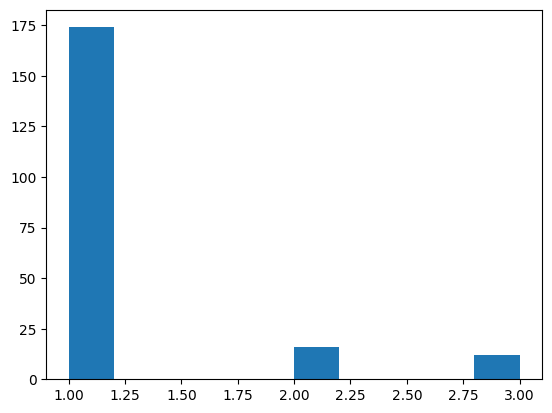

In [ ]:
plt.hist(data[data["Cabin"].isna() == False ]["Pclass"])#독립성 판단을 해보고 결정 Cabin은

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

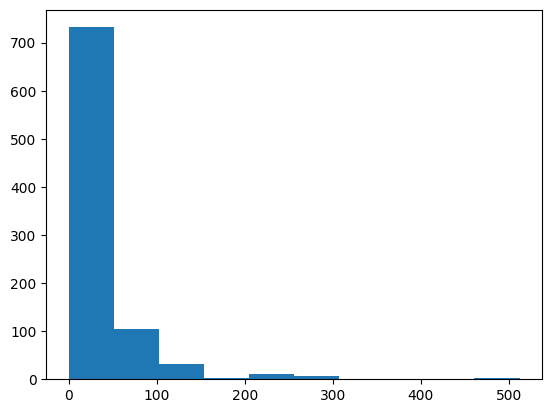

In [ ]:
plt.hist(data["Fare"])#범주화할지 아니면 그냥 연속변수로 받아들일지 근데 너무 편차가 커서

In [ ]:
data=data.drop("Ticket",axis=1)

In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,1,0,3,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,71.2833,C85,C,0
2,3,1,3,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,53.1000,C123,S,0
4,5,0,3,35.0,0,0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,S,1
887,888,1,1,19.0,0,0,30.0000,B42,S,0
888,889,0,3,28.0,1,2,23.4500,NaN,S,0
889,890,1,1,26.0,0,0,30.0000,C148,C,1


In [ ]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [ ]:
data["Cabin"]=data["Cabin"].fillna(0)

In [ ]:
data["Cabin"][data["Cabin"] != 0]=1

<ipython-input-993-bf7a889db1f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cabin"][data["Cabin"] != 0]=1


In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,S,1
1,2,1,1,38.0,1,0,71.2833,1,C,0
2,3,1,3,26.0,0,0,7.9250,0,S,0
3,4,1,1,35.0,1,0,53.1000,1,S,0
4,5,0,3,35.0,0,0,8.0500,0,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,S,1
887,888,1,1,19.0,0,0,30.0000,1,S,0
888,889,0,3,28.0,1,2,23.4500,0,S,0
889,890,1,1,26.0,0,0,30.0000,1,C,1


In [ ]:
data=pd.get_dummies(data,columns=["Pclass"], drop_first=True)

In [ ]:
data=pd.get_dummies(data,columns=["Embarked"], drop_first=True)

In [ ]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,1
888,889,0,28.0,1,2,23.4500,0,0,0,1,0,1
889,890,1,26.0,0,0,30.0000,1,1,0,0,0,0


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
x_num=data[['Age','SibSp','Parch',"Fare"]]
x_cat=data[['Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S']]
 #일단 cabin을 빼고 모델 만들기

In [ ]:
y=data["Survived"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_num

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,28.0,1,2,23.4500
889,26.0,0,0,30.0000


In [ ]:
scaled_xnum=scaler.fit_transform(x_num)

In [ ]:
scaled_xnum=pd.DataFrame(scaled_xnum,columns=x_num.columns)

In [ ]:
scaled_xnum

,Age,SibSp,Parch,Fare
0,-0.563674,0.431350,-0.474326,-0.500240
1,0.669217,0.431350,-0.474326,0.788947
2,-0.255451,-0.475199,-0.474326,-0.486650
3,0.438050,0.431350,-0.474326,0.422861
4,0.438050,-0.475199,-0.474326,-0.484133
...,...,...,...,...
884,-0.178396,-0.475199,-0.474326,-0.384475
885,-0.794841,-0.475199,-0.474326,-0.042213
886,-0.101340,0.431350,2.006119,-0.174084
887,-0.255451,-0.475199,-0.474326,-0.042213


In [ ]:
x_cat=x_cat.reset_index()

In [ ]:
x=pd.concat([scaled_xnum,x_cat],axis=1)

In [ ]:
x=x.drop("index",axis=1)

In [ ]:
x

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-0.563674,0.431350,-0.474326,-0.500240,1,0,1,0,1
1,0.669217,0.431350,-0.474326,0.788947,0,0,0,0,0
2,-0.255451,-0.475199,-0.474326,-0.486650,0,0,1,0,1
3,0.438050,0.431350,-0.474326,0.422861,0,0,0,0,1
4,0.438050,-0.475199,-0.474326,-0.484133,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.475199,-0.474326,-0.384475,1,1,0,0,1
885,-0.794841,-0.475199,-0.474326,-0.042213,0,0,0,0,1
886,-0.101340,0.431350,2.006119,-0.174084,0,0,1,0,1
887,-0.255451,-0.475199,-0.474326,-0.042213,1,0,0,0,0


In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier= XGBClassifier()

In [ ]:
y=y.reset_index()

In [ ]:
y=y.drop("index",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1)

In [ ]:
xgbmodel=classifier.fit(x_train,y_train)

In [ ]:
pred=xgbmodel.predict(x_test)

In [ ]:
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0])

In [ ]:
y_test

,Survived
434,1
131,0
737,0
395,0
716,1
...,...
9,1
674,0
713,0
70,0


In [ ]:
#pip install pycaret

In [ ]:
new_data=pd.concat([x,y],axis=1)

In [ ]:
new_data

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,-0.563674,0.431350,-0.474326,-0.500240,1,0,1,0,1,0
1,0.669217,0.431350,-0.474326,0.788947,0,0,0,0,0,1
2,-0.255451,-0.475199,-0.474326,-0.486650,0,0,1,0,1,1
3,0.438050,0.431350,-0.474326,0.422861,0,0,0,0,1,1
4,0.438050,-0.475199,-0.474326,-0.484133,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.475199,-0.474326,-0.384475,1,1,0,0,1,0
885,-0.794841,-0.475199,-0.474326,-0.042213,0,0,0,0,1,1
886,-0.101340,0.431350,2.006119,-0.174084,0,0,1,0,1,0
887,-0.255451,-0.475199,-0.474326,-0.042213,1,0,0,0,0,1


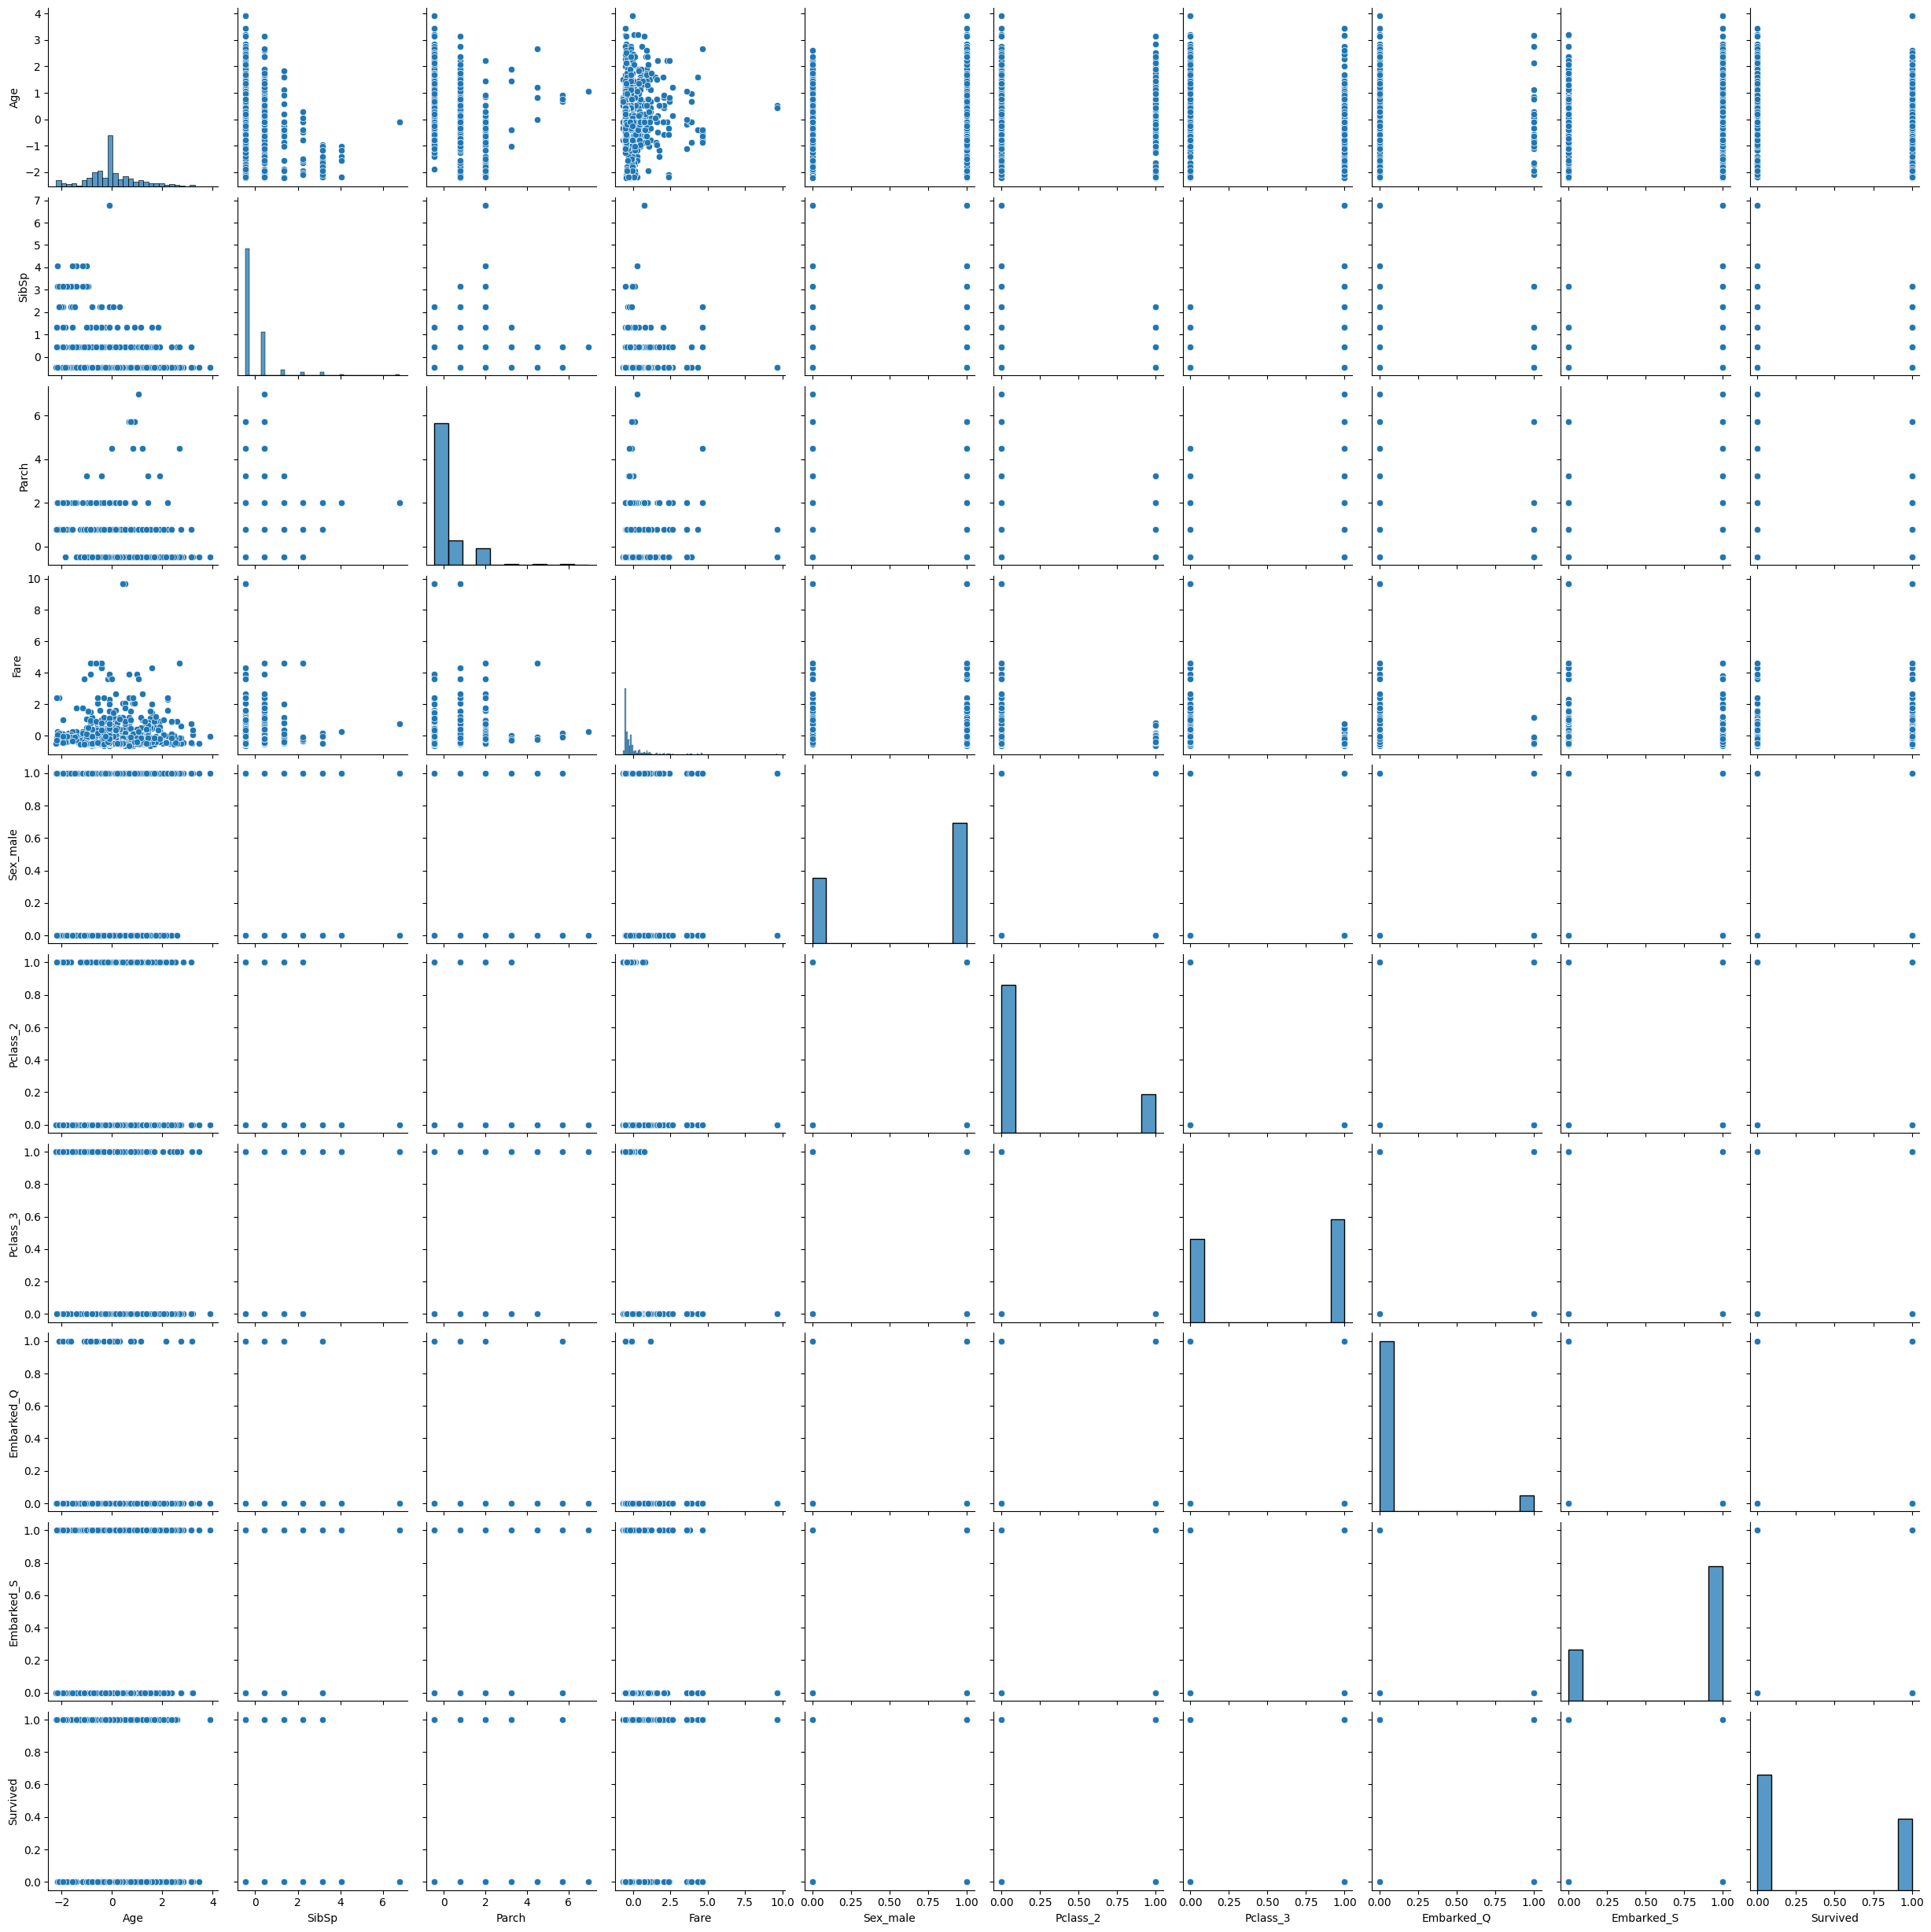

In [ ]:
sns.pairplot(new_data)

In [ ]:
z=data["Cabin"].reset_index()

In [ ]:
z.drop("index",axis=1)

,Cabin
0,0
1,1
2,0
3,1
4,0
...,...
884,0
885,1
886,0
887,1


In [ ]:
new_data

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,-0.563674,0.431350,-0.474326,-0.500240,1,0,1,0,1,0
1,0.669217,0.431350,-0.474326,0.788947,0,0,0,0,0,1
2,-0.255451,-0.475199,-0.474326,-0.486650,0,0,1,0,1,1
3,0.438050,0.431350,-0.474326,0.422861,0,0,0,0,1,1
4,0.438050,-0.475199,-0.474326,-0.484133,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.475199,-0.474326,-0.384475,1,1,0,0,1,0
885,-0.794841,-0.475199,-0.474326,-0.042213,0,0,0,0,1,1
886,-0.101340,0.431350,2.006119,-0.174084,0,0,1,0,1,0
887,-0.255451,-0.475199,-0.474326,-0.042213,1,0,0,0,0,1


In [ ]:
#new_data=new_data.drop("Age",axis=1)

In [ ]:
new_data

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,-0.563674,0.431350,-0.474326,-0.500240,1,0,1,0,1,0
1,0.669217,0.431350,-0.474326,0.788947,0,0,0,0,0,1
2,-0.255451,-0.475199,-0.474326,-0.486650,0,0,1,0,1,1
3,0.438050,0.431350,-0.474326,0.422861,0,0,0,0,1,1
4,0.438050,-0.475199,-0.474326,-0.484133,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.475199,-0.474326,-0.384475,1,1,0,0,1,0
885,-0.794841,-0.475199,-0.474326,-0.042213,0,0,0,0,1,1
886,-0.101340,0.431350,2.006119,-0.174084,0,0,1,0,1,0
887,-0.255451,-0.475199,-0.474326,-0.042213,1,0,0,0,0,1


In [ ]:
from pycaret.classification import *  #일반회귀 모델들에는 다중공선성있어서
setup1= setup(data=new_data, target='Survived',






              fold=5 ,train_size=0.8)#numeric_features=['Age', 'SibSp', 'Parch', 'Fare']
compare_models()


,Description,Value
0,Session id,4601
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(889, 10)"
4,Transformed data shape,"(889, 10)"
5,Transformed train set shape,"(711, 10)"
6,Transformed test set shape,"(178, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8144,0.8543,0.6694,0.8137,0.7341,0.5936,0.6006,0.0960
lightgbm,Light Gradient Boosting Machine,0.8074,0.8471,0.7059,0.7767,0.7381,0.5863,0.5893,0.4960
lr,Logistic Regression,0.8045,0.8418,0.6945,0.7762,0.7304,0.5780,0.5825,0.0420
ada,Ada Boost Classifier,0.7975,0.8374,0.7168,0.7492,0.7303,0.5685,0.5711,0.0880
qda,Quadratic Discriminant Analysis,0.7961,0.8391,0.6983,0.7589,0.7247,0.5633,0.5670,0.0220
xgboost,Extreme Gradient Boosting,0.7933,0.8487,0.7060,0.7436,0.7236,0.5587,0.5598,0.0500
rf,Random Forest Classifier,0.7905,0.8411,0.6838,0.7523,0.7148,0.5498,0.5528,0.1800
nb,Naive Bayes,0.7863,0.8194,0.7020,0.7298,0.7147,0.5441,0.5452,0.0420
ridge,Ridge Classifier,0.7848,0.0000,0.6835,0.7370,0.7080,0.5381,0.5402,0.0220
lda,Linear Discriminant Analysis,0.7848,0.8423,0.6871,0.7354,0.7089,0.5387,0.5408,0.0320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4601, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:

gbc = create_model('gbc')
xgboost = create_model('xgboost')
lightgbm = create_model('lightgbm')
rf=create_model("rf")
ada=create_model("ada")
...
#모델 튜닝

tuned_lightgbm = tune_model(lightgbm)
tuned_xgboost = tune_model(xgboost)
tuned_gbc=tune_model(gbc)
tuned_rf=tune_model(rf)
tuned_ada=tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,0.9416,0.8571,0.9600,0.9057,0.8510,0.8544
1,0.8451,0.9003,0.7143,0.8696,0.7843,0.6652,0.6731
2,0.7887,0.8030,0.5926,0.8000,0.6809,0.5281,0.5414
3,0.8028,0.9108,0.6667,0.7826,0.7200,0.5693,0.5737
4,0.7606,0.8615,0.6296,0.7083,0.6667,0.4809,0.4829
5,0.8732,0.8880,0.7407,0.9091,0.8163,0.7211,0.7299
6,0.8451,0.8434,0.7037,0.8636,0.7755,0.6591,0.6672
7,0.8169,0.8535,0.6667,0.8182,0.7347,0.5971,0.6044
8,0.8451,0.9070,0.7407,0.8333,0.7843,0.6641,0.6669


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9570,0.8571,0.9231,0.8889,0.8224,0.8238
1,0.8310,0.8958,0.7500,0.8077,0.7778,0.6417,0.6429
2,0.7606,0.7753,0.6667,0.6923,0.6792,0.4883,0.4886
3,0.7746,0.8287,0.6296,0.7391,0.6800,0.5078,0.5117
4,0.8028,0.8817,0.7778,0.7241,0.7500,0.5876,0.5886
5,0.8592,0.8729,0.7407,0.8696,0.8000,0.6924,0.6977
6,0.7887,0.8304,0.7407,0.7143,0.7273,0.5550,0.5552
7,0.8028,0.8754,0.6667,0.7826,0.7200,0.5693,0.5737
8,0.8310,0.8906,0.6667,0.8571,0.7500,0.6253,0.6366


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9529,0.7857,0.9167,0.8462,0.7600,0.7655
1,0.8310,0.8933,0.7500,0.8077,0.7778,0.6417,0.6429
2,0.7606,0.7694,0.6296,0.7083,0.6667,0.4809,0.4829
3,0.8310,0.8653,0.7407,0.8000,0.7692,0.6362,0.6374
4,0.7746,0.8758,0.6667,0.7200,0.6923,0.5149,0.5159
5,0.8732,0.8687,0.7778,0.8750,0.8235,0.7252,0.7282
6,0.8028,0.8367,0.7037,0.7600,0.7308,0.5756,0.5766
7,0.8028,0.8880,0.7037,0.7600,0.7308,0.5756,0.5766
8,0.8451,0.8998,0.6667,0.9000,0.7660,0.6540,0.6704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9403,0.7857,0.8800,0.8302,0.7318,0.7347
1,0.7887,0.8924,0.7143,0.7407,0.7273,0.5550,0.5552
2,0.7324,0.7967,0.5556,0.6818,0.6122,0.4112,0.4162
3,0.8310,0.8590,0.7778,0.7778,0.7778,0.6414,0.6414
4,0.8028,0.8699,0.7037,0.7600,0.7308,0.5756,0.5766
5,0.8310,0.8552,0.7407,0.8000,0.7692,0.6362,0.6374
6,0.8028,0.8203,0.7778,0.7241,0.7500,0.5876,0.5886
7,0.8592,0.9226,0.7778,0.8400,0.8077,0.6968,0.6981
8,0.8310,0.8535,0.7407,0.8000,0.7692,0.6362,0.6374


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8472,0.9075,0.7857,0.8148,0.8000,0.6765,0.6768
1,0.9014,0.8904,0.8571,0.8889,0.8727,0.7923,0.7927
2,0.8028,0.7832,0.7037,0.7600,0.7308,0.5756,0.5766
3,0.8028,0.8607,0.7407,0.7407,0.7407,0.5816,0.5816
4,0.7606,0.8224,0.6296,0.7083,0.6667,0.4809,0.4829
5,0.8451,0.8384,0.7407,0.8333,0.7843,0.6641,0.6669
6,0.8169,0.8144,0.6667,0.8182,0.7347,0.5971,0.6044
7,0.8169,0.8405,0.7778,0.7500,0.7636,0.6143,0.6146
8,0.8310,0.8699,0.8519,0.7419,0.7931,0.6514,0.6558


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9505,0.8571,0.9231,0.8889,0.8224,0.8238
1,0.8310,0.8891,0.7500,0.8077,0.7778,0.6417,0.6429
2,0.7606,0.7891,0.6296,0.7083,0.6667,0.4809,0.4829
3,0.8310,0.8880,0.7778,0.7778,0.7778,0.6414,0.6414
4,0.8169,0.8750,0.7407,0.7692,0.7547,0.6087,0.6090
5,0.8732,0.8594,0.7778,0.8750,0.8235,0.7252,0.7282
6,0.8592,0.8178,0.7407,0.8696,0.8000,0.6924,0.6977
7,0.8451,0.8956,0.7037,0.8636,0.7755,0.6591,0.6672
8,0.8592,0.8977,0.7037,0.9048,0.7917,0.6878,0.7002


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9619,0.7500,0.9545,0.8400,0.7568,0.7697
1,0.8451,0.9074,0.6786,0.9048,0.7755,0.6609,0.6768
2,0.7324,0.7774,0.4815,0.7222,0.5778,0.3932,0.4105
3,0.7606,0.8641,0.6296,0.7083,0.6667,0.4809,0.4829
4,0.8028,0.8594,0.5556,0.8824,0.6818,0.5494,0.5803
5,0.8732,0.8544,0.7407,0.9091,0.8163,0.7211,0.7299
6,0.8451,0.8443,0.6667,0.9000,0.7660,0.6540,0.6704
7,0.8028,0.8822,0.7037,0.7600,0.7308,0.5756,0.5766
8,0.8451,0.8796,0.6667,0.9000,0.7660,0.6540,0.6704


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9326,0.8571,0.9231,0.8889,0.8224,0.8238
1,0.8310,0.8966,0.6429,0.9000,0.7500,0.6276,0.6479
2,0.7606,0.7740,0.5556,0.7500,0.6383,0.4652,0.4769
3,0.8028,0.8801,0.7037,0.7600,0.7308,0.5756,0.5766
4,0.7606,0.8594,0.5926,0.7273,0.6531,0.4732,0.4789
5,0.8732,0.8464,0.7407,0.9091,0.8163,0.7211,0.7299
6,0.8592,0.8342,0.7037,0.9048,0.7917,0.6878,0.7002
7,0.8310,0.8935,0.7037,0.8261,0.7600,0.6308,0.6357
8,0.8592,0.8830,0.7037,0.9048,0.7917,0.6878,0.7002


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9456,0.8929,0.8929,0.8929,0.8247,0.8247
1,0.8451,0.8949,0.7500,0.8400,0.7925,0.6695,0.6722
2,0.7465,0.7774,0.5926,0.6957,0.6400,0.4463,0.4497
3,0.8028,0.8801,0.7407,0.7407,0.7407,0.5816,0.5816
4,0.8169,0.8649,0.7778,0.7500,0.7636,0.6143,0.6146
5,0.8592,0.8923,0.7778,0.8400,0.8077,0.6968,0.6981
6,0.8451,0.8182,0.7407,0.8333,0.7843,0.6641,0.6669
7,0.8451,0.9007,0.7778,0.8077,0.7925,0.6689,0.6692
8,0.8451,0.8674,0.7037,0.8636,0.7755,0.6591,0.6672


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.8973,0.7857,0.7586,0.7719,0.6226,0.6228
1,0.8451,0.9061,0.7500,0.8400,0.7925,0.6695,0.6722
2,0.7183,0.7597,0.5185,0.6667,0.5833,0.3755,0.3823
3,0.8028,0.8514,0.7778,0.7241,0.7500,0.5876,0.5886
4,0.7324,0.7731,0.5556,0.6818,0.6122,0.4112,0.4162
5,0.8451,0.8199,0.7407,0.8333,0.7843,0.6641,0.6669
6,0.8169,0.8342,0.6296,0.8500,0.7234,0.5911,0.6059
7,0.8592,0.8767,0.7778,0.8400,0.8077,0.6968,0.6981
8,0.7887,0.8540,0.7407,0.7143,0.7273,0.5550,0.5552


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#모델 블렌딩
tuned = [tuned_gbc,tuned_ada,tuned_xgboost,tuned_lightgbm]
blender = blend_models(tuned)
#최종 예측
prediction = predict_model(blender, data=new_data)
prediction

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9529,0.8214,0.9583,0.8846,0.8200,0.8260
1,0.8592,0.9016,0.7143,0.9091,0.8000,0.6937,0.7057
2,0.7606,0.7963,0.5926,0.7273,0.6531,0.4732,0.4789
3,0.8028,0.8990,0.6667,0.7826,0.7200,0.5693,0.5737
4,0.7887,0.8674,0.6667,0.7500,0.7059,0.5419,0.5442
5,0.8732,0.8670,0.7778,0.8750,0.8235,0.7252,0.7282
6,0.8592,0.8371,0.7037,0.9048,0.7917,0.6878,0.7002
7,0.8028,0.8880,0.6667,0.7826,0.7200,0.5693,0.5737
8,0.8592,0.8990,0.7037,0.9048,0.7917,0.6878,0.7002


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8796,0.9353,0.7706,0.9003,0.8304,0.7380,0.7434


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived,prediction_label,prediction_score
0,-0.563674,0.431350,-0.474326,-0.500240,1,0,1,0,1,0,0,0.8200
1,0.669217,0.431350,-0.474326,0.788947,0,0,0,0,0,1,1,0.8446
2,-0.255451,-0.475199,-0.474326,-0.486650,0,0,1,0,1,1,1,0.5189
3,0.438050,0.431350,-0.474326,0.422861,0,0,0,0,1,1,1,0.8681
4,0.438050,-0.475199,-0.474326,-0.484133,1,0,1,0,1,0,0,0.7624
...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.475199,-0.474326,-0.384475,1,1,0,0,1,0,0,0.7731
885,-0.794841,-0.475199,-0.474326,-0.042213,0,0,0,0,1,1,1,0.8401
886,-0.101340,0.431350,2.006119,-0.174084,0,0,1,0,1,0,0,0.6842
887,-0.255451,-0.475199,-0.474326,-0.042213,1,0,0,0,0,1,1,0.5347


In [ ]:
blender

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=11,
                                             min_child_weight=0.001,
                                             min_split_gain=0.1,
                                             n_estimators=160, n_jobs=-1,
                                             num_leaves=200, objective=None,
                                             random_state=5258, reg_alpha=0.4,
                                             reg_lambda=0.01, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
test=test.drop(["Name","PassengerId","Ticket"],axis=1)

In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [ ]:
test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [ ]:
test=pd.get_dummies(test,columns=["Sex"], drop_first=True)

In [ ]:
test=pd.get_dummies(test,columns=["Embarked"], drop_first=True)

In [ ]:
test=pd.get_dummies(test,columns=["Pclass"], drop_first=True)

In [ ]:
test

,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,NaN,1,1,0,0,1
1,47.0,1,0,7.0000,NaN,0,0,1,0,1
2,62.0,0,0,9.6875,NaN,1,1,0,1,0
3,27.0,0,0,8.6625,NaN,1,0,1,0,1
4,22.0,1,1,12.2875,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,NaN,1,0,1,0,1
414,39.0,0,0,108.9000,C105,0,0,0,0,0
415,38.5,0,0,7.2500,NaN,1,0,1,0,1
416,NaN,0,0,8.0500,NaN,1,0,1,0,1


In [ ]:
test["Age"]=test["Age"].fillna(np.mean(test['Age']))

In [ ]:
test=test.drop("Cabin",axis=1)

In [ ]:
test

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.50000,0,0,7.8292,1,1,0,0,1
1,47.00000,1,0,7.0000,0,0,1,0,1
2,62.00000,0,0,9.6875,1,1,0,1,0
3,27.00000,0,0,8.6625,1,0,1,0,1
4,22.00000,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,1,0,1,0,1
414,39.00000,0,0,108.9000,0,0,0,0,0
415,38.50000,0,0,7.2500,1,0,1,0,1
416,30.27259,0,0,8.0500,1,0,1,0,1


In [ ]:
x_num=test[['Age','SibSp','Parch',"Fare"]]
x_cat=test[['Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S']]

In [ ]:
scaled_xnum=scaler.fit_transform(x_num)

In [ ]:
scaled_xnum=pd.DataFrame(scaled_xnum,columns=x_num.columns)

In [ ]:
scaled_xnum

,Age,SibSp,Parch,Fare
0,0.334993,-0.499470,-0.400248,-0.497811
1,1.325530,0.616992,-0.400248,-0.512660
2,2.514175,-0.499470,-0.400248,-0.464532
3,-0.259330,-0.499470,-0.400248,-0.482888
4,-0.655545,0.616992,0.619896,-0.417971
...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.493856
414,0.691586,-0.499470,-0.400248,1.312180
415,0.651965,-0.499470,-0.400248,-0.508183
416,0.000000,-0.499470,-0.400248,-0.493856


In [ ]:
x_cat=x_cat.reset_index()

In [ ]:
x_cat=x_cat.drop("index",axis=1)

In [ ]:
test_data= pd.concat([scaled_xnum,x_cat],axis=1)

In [ ]:
test_data

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.334993,-0.499470,-0.400248,-0.497811,1,0,1,1,0
1,1.325530,0.616992,-0.400248,-0.512660,0,0,1,0,1
2,2.514175,-0.499470,-0.400248,-0.464532,1,1,0,1,0
3,-0.259330,-0.499470,-0.400248,-0.482888,1,0,1,0,1
4,-0.655545,0.616992,0.619896,-0.417971,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.493856,1,0,1,0,1
414,0.691586,-0.499470,-0.400248,1.312180,0,0,0,0,0
415,0.651965,-0.499470,-0.400248,-0.508183,1,0,1,0,1
416,0.000000,-0.499470,-0.400248,-0.493856,1,0,1,0,1


In [ ]:
  prediction1 = predict_model(blender, data=test_data)#만든 모델
prediction1

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,prediction_label,prediction_score
0,0.334993,-0.499470,-0.400248,-0.497811,1,0,1,1,0,0,0.8614
1,1.325530,0.616992,-0.400248,-0.512660,0,0,1,0,1,0,0.6493
2,2.514175,-0.499470,-0.400248,-0.464532,1,1,0,1,0,0,0.8201
3,-0.259330,-0.499470,-0.400248,-0.482888,1,0,1,0,1,0,0.7844
4,-0.655545,0.616992,0.619896,-0.417971,0,0,1,0,1,0,0.6211
...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.493856,1,0,1,0,1,0,0.8575
414,0.691586,-0.499470,-0.400248,1.312180,0,0,0,0,0,1,0.8836
415,0.651965,-0.499470,-0.400248,-0.508183,1,0,1,0,1,0,0.8878
416,0.000000,-0.499470,-0.400248,-0.493856,1,0,1,0,1,0,0.8575


In [ ]:
prediction1.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'prediction_label', 'prediction_score'],
      dtype='object')

In [ ]:
prediction1=prediction1.drop(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S','prediction_score'],axis=1)

In [ ]:
prediction1=pd.concat([test['PassengerId'],prediction1],axis=1)

KeyError: ignored

In [ ]:
prediction1